In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pima_diabetes.csv")

X = df.iloc[:, :-1].values  
y = df.iloc[:, -1].values   

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape, y_train.shape)
print("Testing Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (613, 8) (613,)
Testing Set Shape: (154, 8) (154,)


In [5]:
def create_improved_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X.shape[1],)),  
        BatchNormalization(),  
        Dense(16, activation='relu'),  
        Dropout(0.3),  
        Dense(8, activation='relu'), 
        Dense(1, activation='sigmoid')  
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [6]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model_cv = KerasClassifier(build_fn=create_improved_model, epochs=50, batch_size=16, verbose=0)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_results = cross_val_score(model_cv, X, y, cv=kfold)

print(f"Cross-Validation Accuracy: {cv_results.mean():.4f} ± {cv_results.std():.4f}")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   OMP_NUM_THREADS=8

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_IN

Cross-Validation Accuracy: 0.7315 ± 0.0446


In [7]:
model = create_improved_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Train on 613 samples, validate on 154 samples
Epoch 1/50
613/613 [==============================] - 2s 3ms/sample - loss: 0.7061 - acc: 0.5595 - val_loss: 0.6893 - val_acc: 0.5779
Epoch 2/50
613/613 [==============================] - 0s 261us/sample - loss: 0.6007 - acc: 0.6591 - val_loss: 0.6299 - val_acc: 0.6364
Epoch 3/50
613/613 [==============================] - 0s 280us/sample - loss: 0.5468 - acc: 0.7210 - val_loss: 0.5917 - val_acc: 0.6364
Epoch 4/50
613/613 [==============================] - 0s 277us/sample - loss: 0.5334 - acc: 0.6982 - val_loss: 0.5694 - val_acc: 0.6623
Epoch 5/50
613/613 [==============================] - 0s 268us/sample - loss: 0.5044 - acc: 0.7406 - val_loss: 0.5518 - val_acc: 0.6623
Epoch 6/50
613/613 [==============================] - 0s 274us/sample - loss: 0.4886 - acc: 0.7569 - val_loss: 0.5426 - val_acc: 0.6948
Epoch 7/50
613/613 [==============================] - 0s 266us/sample - loss: 0.4982 - acc: 0.7586 - val_loss: 0.5313 - val_acc: 0.6883
Epoc

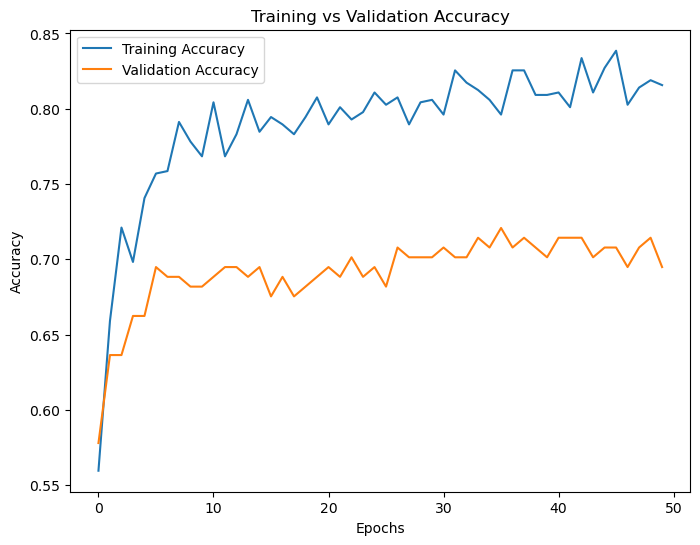

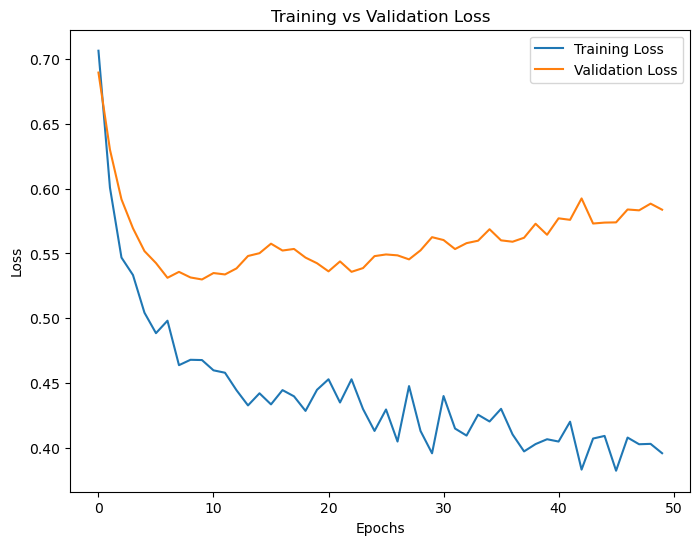

In [9]:
available_keys = history.history.keys()
accuracy_key = 'accuracy' if 'accuracy' in available_keys else 'acc'
val_accuracy_key = 'val_accuracy' if 'val_accuracy' in available_keys else 'val_acc'

plt.figure(figsize=(8,6))
plt.plot(history.history[accuracy_key], label="Training Accuracy")
plt.plot(history.history[val_accuracy_key], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()